In [ ]:
!pip3 install chess

In [ ]:
import chess
import chess.svg
import torch
from IPython.display import SVG, display
import random
from datetime import datetime

In [ ]:
model_white = torch.load("0147_loss.pt")
model_black = torch.load("one_hot_from_colab.pt")
model_white.to(torch.device('cuda:0'))
model_black.to(torch.device('cuda:0'))

Sequential(
  (0): Linear(in_features=641, out_features=512, bias=True)
  (1): ReLU()
  (2): Linear(in_features=512, out_features=32, bias=True)
  (3): ReLU()
  (4): Linear(in_features=32, out_features=32, bias=True)
  (5): ReLU()
  (6): Linear(in_features=32, out_features=3, bias=True)
)

In [ ]:
def display_board(board, move):
  if move:
    display(SVG(chess.svg.board(board=board, size=250,arrows=[chess.svg.Arrow(move.from_square, move.to_square, color="#FEDE00")],)))
  else:
    display(SVG(chess.svg.board(board=board, size=250)))

In [ ]:
def randomize_legal_moves(legal_moves):
  list_legal_moves = list(legal_moves)
  random.shuffle(list_legal_moves)
  return list_legal_moves

In [ ]:
def convertPositionToString(board):
    piece_values = {'p': 1, 'r': 5, 'n': 3, 'b': 3, 'q': 10, 'k': 1000}
    board = str(board)
    lines = board.split('\n')

    result = []
    for line in lines:
        for char in line.split(' '):
            char = char.strip()
            if char.lower() in piece_values:
                value = piece_values[char.lower()]
                result.append(str(value) if char.islower() else str(-value))
            else:
                result.append('0')

    return ','.join(result)

In [ ]:
import time
def eval_best_white_move(randomized_legal_moves, seconds=5):
  best_prediction_value = 0 #means black is winning
  best_prediction_move =""
  start = time.time()
  for move in randomized_legal_moves:
    if time.time() - start > seconds:
      break
    board.push(move)
    input_to_network = "0," + convertPositionToString(board)
    input_to_network = input_to_network.split(',')
    input_to_network = [int(pos) for pos in input_to_network]
    eval = torch.tensor(input_to_network, dtype=torch.float32, device=torch.device('cuda:0')) #make automatic decision with device so we can run anywhere
    evaluation = model_white(eval)[0]
    #print(evaluation)
    if evaluation > best_prediction_value:
       best_prediction_value = evaluation
       best_prediction_move = move
    board.pop()
  print(f"White played '{best_prediction_move}' with prediction value '{best_prediction_value}, see new board below this")
  return best_prediction_move


In [ ]:
import numpy as np
one_hot_mapping = {
    0: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],  # Empty
    1: [1, 0, 0, 0, 0, 0, 0, 0, 0, 0],  # White Pawn
    3: [0, 1, 0, 0, 0, 0, 0, 0, 0, 0],  # White Knight/Bishop
    5: [0, 0, 1, 0, 0, 0, 0, 0, 0, 0],  # White Rook
    10: [0, 0, 0, 1, 0, 0, 0, 0, 0, 0],  # White Queen
    1000: [0, 0, 0, 0, 1, 0, 0, 0, 0, 0],  # White King
    -1: [0, 0, 0, 0, 0, 1, 0, 0, 0, 0],  # Black Pawn
    -3: [0, 0, 0, 0, 0, 0, 1, 0, 0, 0],  # Black Knight/Bishop
    -5: [0, 0, 0, 0, 0, 0, 0, 1, 0, 0],  # Black Rook
    -10: [0, 0, 0, 0, 0, 0, 0, 0, 1, 0],  # Black Queen
    -1000: [0, 0, 0, 0, 0, 0, 0, 0, 0, 1]  # Black King
}
def transformSingleBoardToOneHot(board):
    newBoardRepresentation = np.array([board[0]]) # First entry is whose turn it is
    for field in board[1:]:
        newBoardRepresentation = np.append(newBoardRepresentation, one_hot_mapping[field])

    return newBoardRepresentation


In [ ]:
import torch.nn.functional as F

def eval_best_black_move(randomized_legal_moves, seconds=5):
  best_prediction_value = 0 #cant go lower than 0% win
  best_prediction_move =""
  start = time.time()
  for move in randomized_legal_moves:
    if time.time() - start > seconds:
      break
    board.push(move)
    input_to_network = "1," + convertPositionToString(board)
    input_to_network = input_to_network.split(',')
    input_to_network = [int(pos) for pos in input_to_network]
    input_to_network = transformSingleBoardToOneHot(input_to_network)
    eval = torch.tensor(input_to_network, dtype=torch.float32, device=torch.device('cuda:0')) #make automatic decision with device so we can run anywhere
    evaluation = model_black(eval)
    probability = F.softmax(evaluation, dim=0)[1]
    if probability > best_prediction_value:
      best_prediction_value = probability
      best_prediction_move = move
    board.pop()

  print(f"Black played '{best_prediction_move}' with winning percentage '{best_prediction_value*100}, see new board below this")
  return best_prediction_move


see this bitch

White played 'b1c3' with prediction value '0.45057958364486694, see new board below this


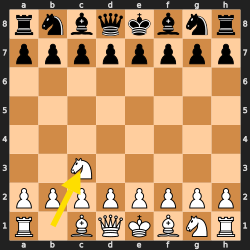

Black played 'b8c6' with winning percentage '1.0628080360230996e-10, see new board below this


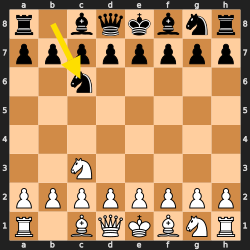

White played 'h2h4' with prediction value '0.4513179361820221, see new board below this


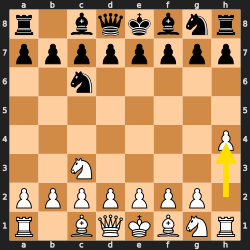

Black played 'a8b8' with winning percentage '99.99996185302734, see new board below this


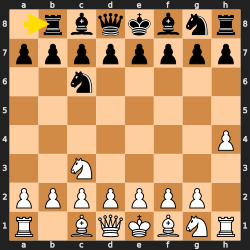

White played 'g1f3' with prediction value '0.431125283241272, see new board below this


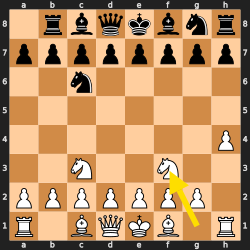

Black played 'a7a5' with winning percentage '100.0, see new board below this


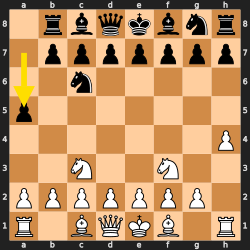

White played 'c3e4' with prediction value '0.43196943402290344, see new board below this


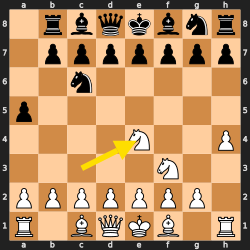

Black played 'h7h6' with winning percentage '100.0, see new board below this


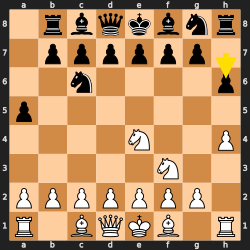

White played 'c2c3' with prediction value '0.4340527355670929, see new board below this


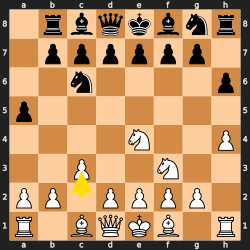

Black played 'a5a4' with winning percentage '100.0, see new board below this


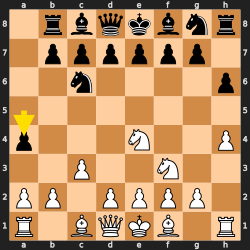

White played 'g2g4' with prediction value '0.44018590450286865, see new board below this


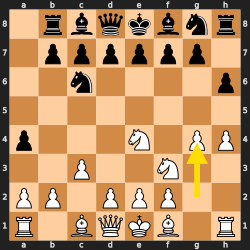

Black played 'c6e5' with winning percentage '100.0, see new board below this


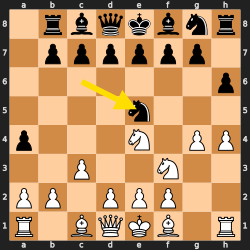

White played 'f3e5' with prediction value '0.5385291576385498, see new board below this


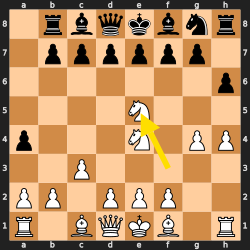

Black played 'h6h5' with winning percentage '100.0, see new board below this


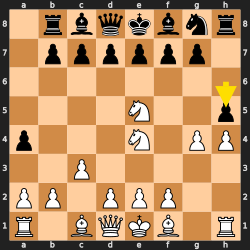

White played 'e5d7' with prediction value '0.5888350009918213, see new board below this


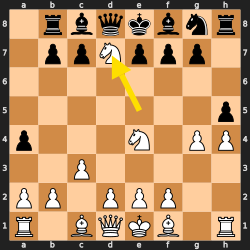

Black played 'f7f5' with winning percentage '100.0, see new board below this


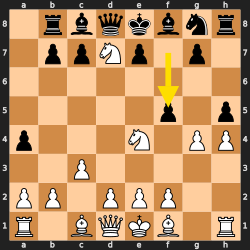

White played 'd7b8' with prediction value '0.8292709589004517, see new board below this


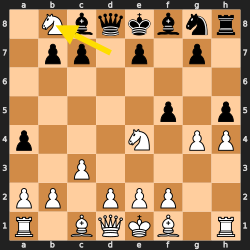

Black played 'd8d3' with winning percentage '100.0, see new board below this


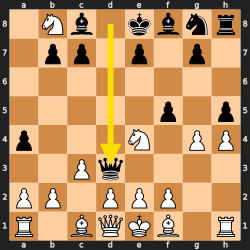

White played 'e2d3' with prediction value '0.9150457382202148, see new board below this


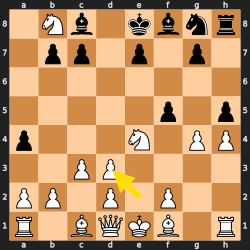

Black played 'e7e5' with winning percentage '7.909017679056524e-15, see new board below this


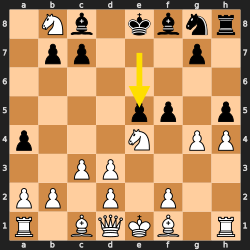

White played 'g4h5' with prediction value '0.9242995381355286, see new board below this


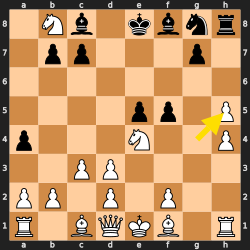

Black played 'f5e4' with winning percentage '2.1459510261986024e-14, see new board below this


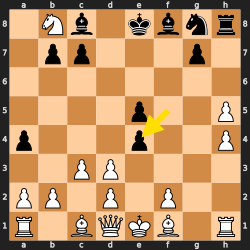

White played 'h1h2' with prediction value '0.9149330854415894, see new board below this


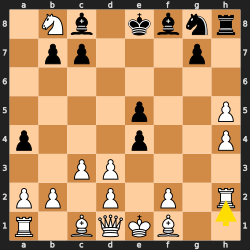

Black played 'c8f5' with winning percentage '95.902099609375, see new board below this


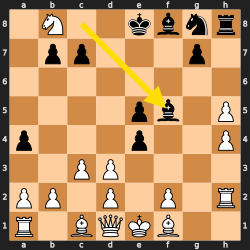

White played 'f1g2' with prediction value '0.9182441234588623, see new board below this


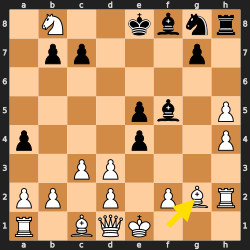

Black played 'h8h6' with winning percentage '49.93607711791992, see new board below this


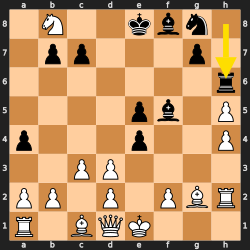

White played 'e1f1' with prediction value '0.9460761547088623, see new board below this


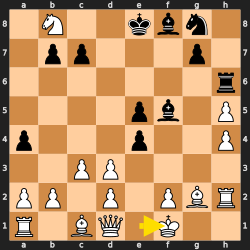

Black played 'c7c5' with winning percentage '100.0, see new board below this


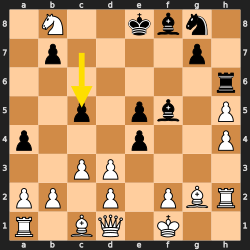

White played 'g2e4' with prediction value '0.956953763961792, see new board below this


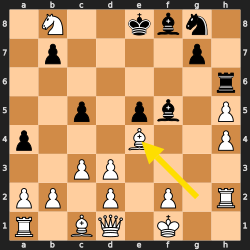

Black played 'g8e7' with winning percentage '0.1795935034751892, see new board below this


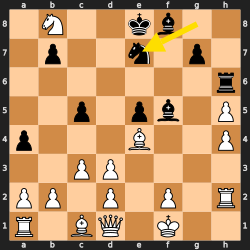

White played 'e4f5' with prediction value '0.9824696779251099, see new board below this


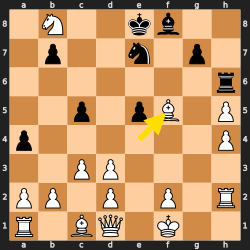

Black played 'e7f5' with winning percentage '1.0090569048770703e-05, see new board below this


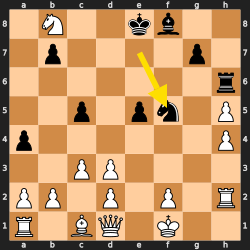

White played 'd1a4' with prediction value '0.9613980054855347, see new board below this


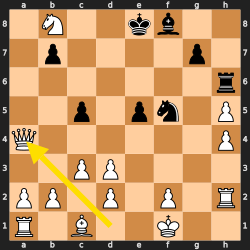

Black played 'h6c6' with winning percentage '2.1380018748952157e-22, see new board below this


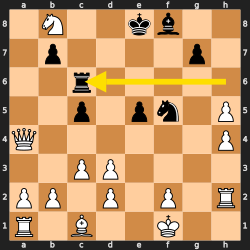

White played 'a4c6' with prediction value '1.0317401885986328, see new board below this


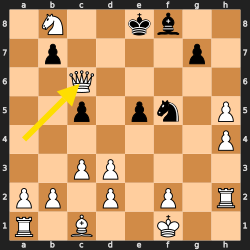

Black played 'b7c6' with winning percentage '3.5632954373916213e-23, see new board below this


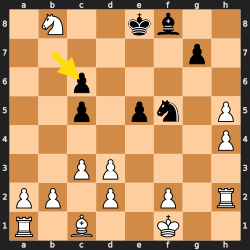

White played 'f1e1' with prediction value '0.9273611307144165, see new board below this


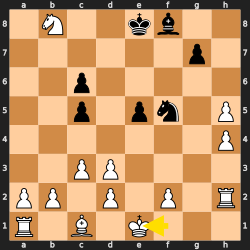

Black played 'e5e4' with winning percentage '1.181406674465636e-21, see new board below this


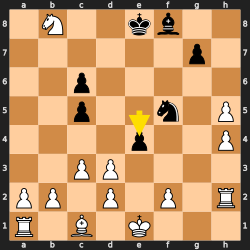

White played 'h2g2' with prediction value '0.9281933903694153, see new board below this


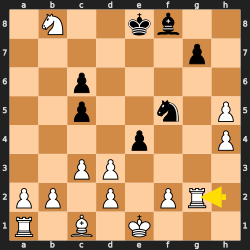

Black played 'e4e3' with winning percentage '2.0620123989366357e-13, see new board below this


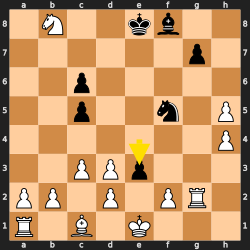

White played 'h5h6' with prediction value '0.9283424019813538, see new board below this


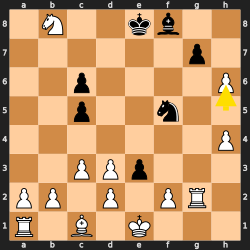

Black played 'c5c4' with winning percentage '0.004694401286542416, see new board below this


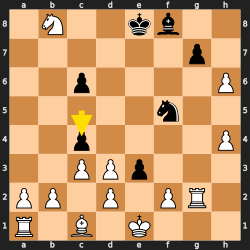

White played 'h4h5' with prediction value '0.9288604259490967, see new board below this


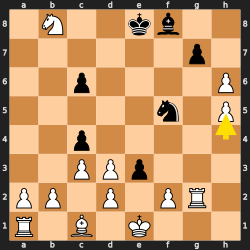

Black played 'f8c5' with winning percentage '1.592114131199196e-06, see new board below this


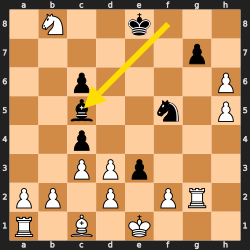

White played 'd3d4' with prediction value '0.9283912777900696, see new board below this


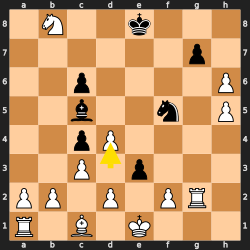

Black played 'c5d4' with winning percentage '2.6174328327178955, see new board below this


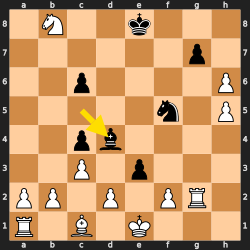

White played 'e1e2' with prediction value '0.9329345226287842, see new board below this


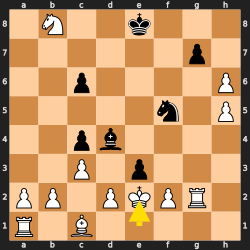

Black played 'e8f8' with winning percentage '99.98652648925781, see new board below this


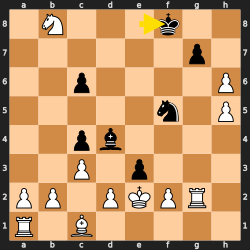

White played 'e2d1' with prediction value '1.0049431324005127, see new board below this


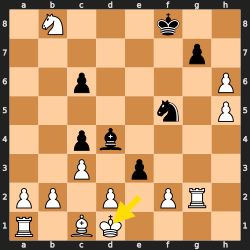

Black played 'f8g8' with winning percentage '99.99990844726562, see new board below this


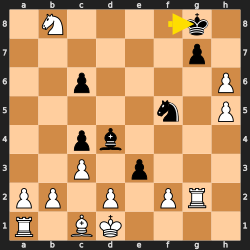

White played 'd1e2' with prediction value '0.984323263168335, see new board below this


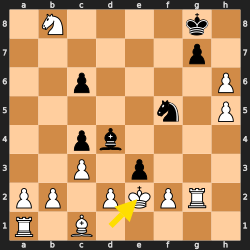

Black played 'd4b6' with winning percentage '100.0, see new board below this


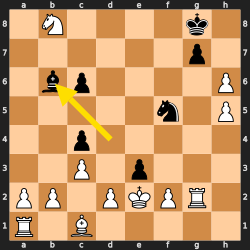

White played 'g2h2' with prediction value '0.9856148362159729, see new board below this


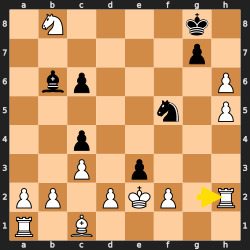

Black played 'g8f8' with winning percentage '100.0, see new board below this


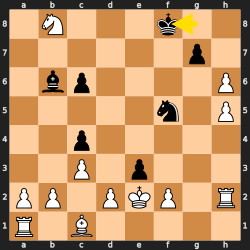

White played 'e2d1' with prediction value '1.0072283744812012, see new board below this


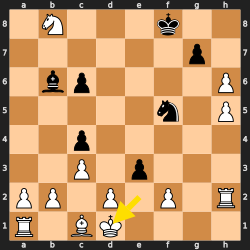

Black played 'e3d2' with winning percentage '100.0, see new board below this


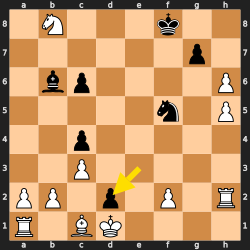

White played 'h6g7' with prediction value '1.0074182748794556, see new board below this


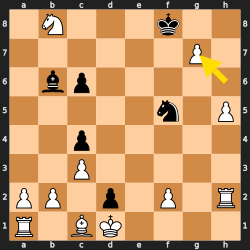

Black played 'f8g7' with winning percentage '9.779024124145508, see new board below this


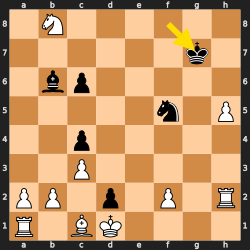

White played 'b8a6' with prediction value '0.911027193069458, see new board below this


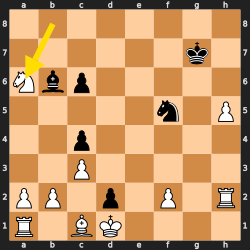

Black played 'd2c1b' with winning percentage '100.0, see new board below this


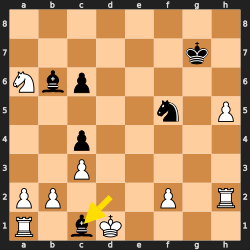

White played 'd1c1' with prediction value '0.9438323974609375, see new board below this


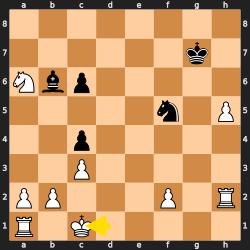

Black played 'g7g8' with winning percentage '99.98445129394531, see new board below this


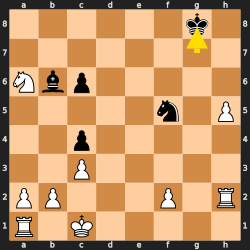

White played 'h2h3' with prediction value '1.0428814888000488, see new board below this


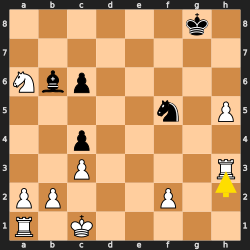

Black played 'f5h6' with winning percentage '99.99879455566406, see new board below this


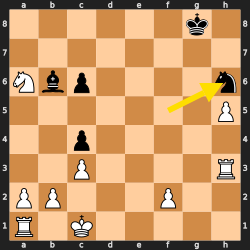

White played 'f2f3' with prediction value '1.0400936603546143, see new board below this


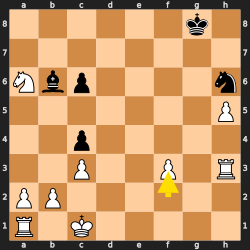

Black played 'c6c5' with winning percentage '99.99380493164062, see new board below this


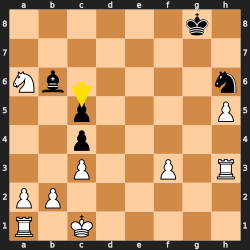

White played 'a6c5' with prediction value '1.0467040538787842, see new board below this


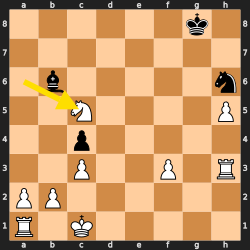

Black played 'b6c5' with winning percentage '1.2920530025439803e-05, see new board below this


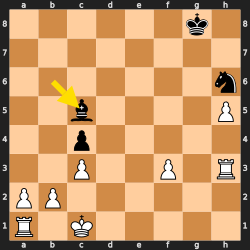

White played 'a1b1' with prediction value '0.9593138694763184, see new board below this


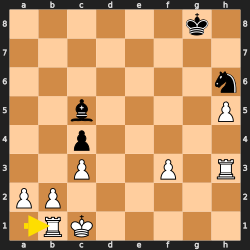

Black played 'c5b6' with winning percentage '5.3914398449705914e-05, see new board below this


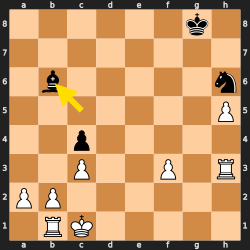

White played 'f3f4' with prediction value '0.9579095840454102, see new board below this


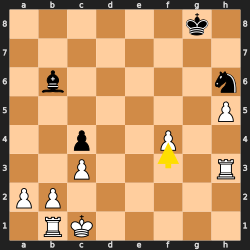

Black played 'b6d4' with winning percentage '99.99991607666016, see new board below this


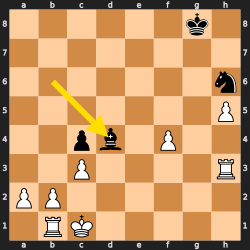

White played 'c3d4' with prediction value '1.0434038639068604, see new board below this


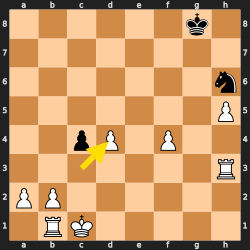

Black played 'g8h8' with winning percentage '6.490131765346518e-10, see new board below this


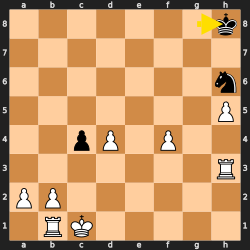

White played 'h3g3' with prediction value '0.9759624600410461, see new board below this


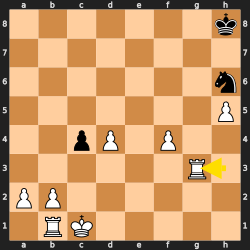

Black played 'h6g8' with winning percentage '2.675795278349811e-18, see new board below this


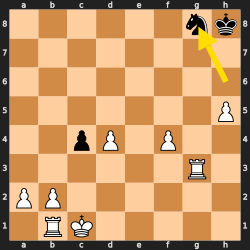

White played 'g3g8' with prediction value '0.9934139251708984, see new board below this


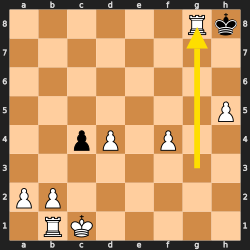

Black played 'h8h7' with winning percentage '4.562011358955065e-12, see new board below this


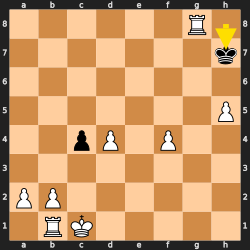

White played 'g8b8' with prediction value '1.0216219425201416, see new board below this


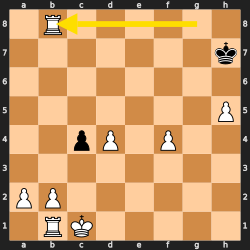

Black played 'h7g7' with winning percentage '1.559694333107271e-18, see new board below this


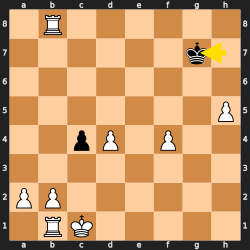

White played 'b8h8' with prediction value '0.935741662979126, see new board below this


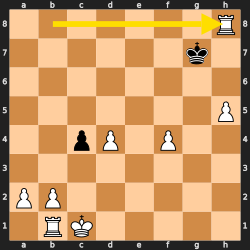

Black played 'g7h8' with winning percentage '1.4158434624364502e-12, see new board below this


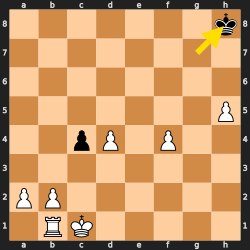

White played 'a2a4' with prediction value '0.9627945423126221, see new board below this


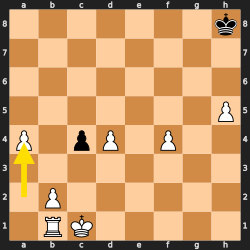

Black played 'h8g7' with winning percentage '1.407713006363361e-17, see new board below this


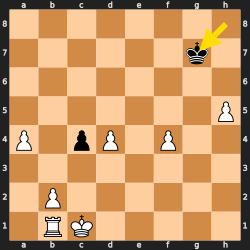

White played 'b1a1' with prediction value '0.946381688117981, see new board below this


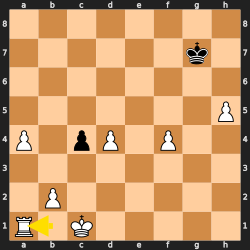

Black played 'g7h8' with winning percentage '1.2181328168381356e-09, see new board below this


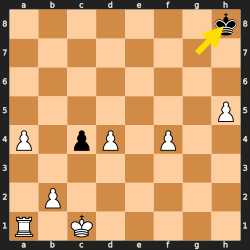

White played 'a1b1' with prediction value '0.9627945423126221, see new board below this


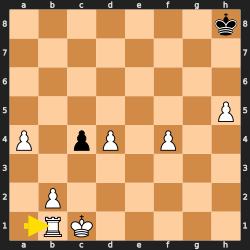

Black played 'h8g7' with winning percentage '1.407713006363361e-17, see new board below this


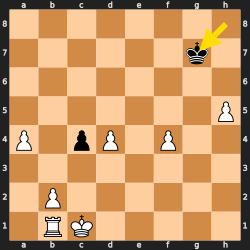

White played 'b1a1' with prediction value '0.946381688117981, see new board below this


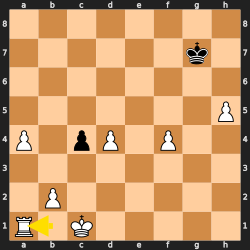

Black played 'g7h8' with winning percentage '1.2181328168381356e-09, see new board below this


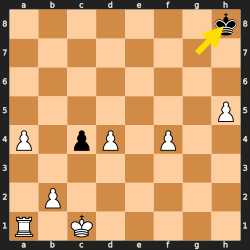

White played 'a1b1' with prediction value '0.9627945423126221, see new board below this


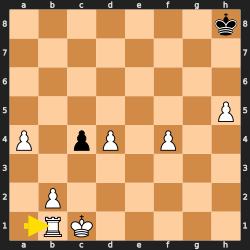

Black played 'h8g7' with winning percentage '1.407713006363361e-17, see new board below this


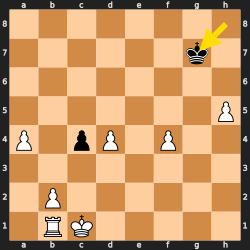

White played 'b1a1' with prediction value '0.946381688117981, see new board below this


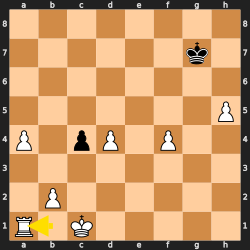

Black played 'g7h8' with winning percentage '1.2181328168381356e-09, see new board below this


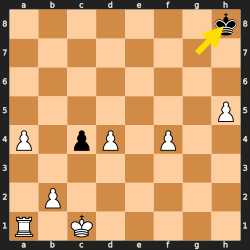

White played 'a1b1' with prediction value '0.9627945423126221, see new board below this


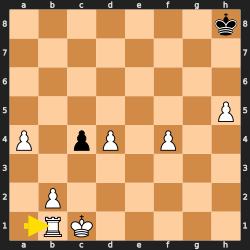

Black played 'h8g7' with winning percentage '1.407713006363361e-17, see new board below this


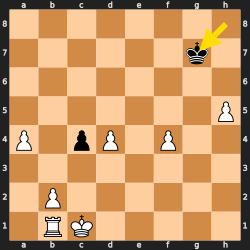

White played 'b1a1' with prediction value '0.946381688117981, see new board below this


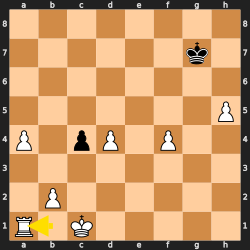

Black played 'g7h8' with winning percentage '1.2181328168381356e-09, see new board below this


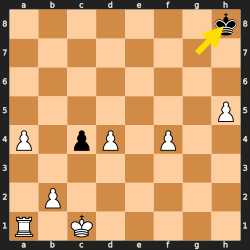

White played 'a1b1' with prediction value '0.9627945423126221, see new board below this


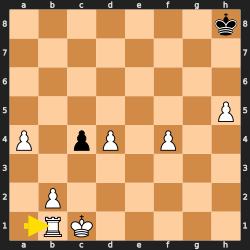

game over


In [ ]:
board = chess.Board()
randomized_legal_moves = randomize_legal_moves(board.legal_moves)
white_best_move = eval_best_white_move(randomized_legal_moves)
board.push(white_best_move)
display_board(board, white_best_move)

while not board.is_game_over():
  randomized_legal_moves = randomize_legal_moves(board.legal_moves)
  black_best_move = eval_best_black_move(randomized_legal_moves)
  board.push(black_best_move)
  display_board(board, black_best_move)
  if not board.is_game_over():
    randomized_legal_moves = randomize_legal_moves(board.legal_moves)
    white_best_move = eval_best_white_move(randomized_legal_moves)
    board.push(white_best_move)
    display_board(board, white_best_move)

print("game over")